In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

In [3]:

# Import local classes
import sys
sys.path.append(r'C:\Users\sieme\OneDrive\Documenten\16. TA, Probabilistic Design\bivariate\src')

import bivariate.class_dataset
import bivariate.class_multivar
import bivariate.class_emperical

In [4]:
# Import data
AX1, AX2 = np.genfromtxt('data_axle.csv', delimiter=",", unpack = True)

In [5]:
# Create object of class Emperical_data
AX1_object = bivariate.class_emperical.Emperical_data(time_series_data =  AX1, data_title = 'AX1', data_units = 'Axle load [kN]')
AX2_object = bivariate.class_emperical.Emperical_data(time_series_data =  AX2, data_title = 'AX2', data_units = 'Axle load [kN]')

In [6]:
# F STRING FORMATTING, USE DECIMALS AND KEEP IN MIND 
# BENJAMIN ALREADY DID THAT, WHILE PLOTTINIG FIGURES FOR BIVARIATE, AND OR OR PLOTS


# if not compare:
#             if p < 0.01:
#                 ax.text(.01, .01, r"$(P=$" + "{:.2e})".format(p), ha="left", va="bottom", transform=ax.transAxes)
#                 ax.set_title("$p_{AND}$" + " (={:.2e}".format(p) + ")", fontsize=18)
#             else:
#                 ax.text(.01, .01, r"$(P=$" + "{:.4f})".format(p), ha="left", va="bottom", transform=ax.transAxes)
#                 ax.set_title("$p_{AND}$" + " (={:.4f}".format(p) + ")", fontsize=18)
#         else:
#             if p < 0.01:
#                 ax.text(.01, .07, r"$(P_{2}=$" + "{:.2e})".format(p), ha="left", transform=ax.transAxes)
#                 ax.set_title("$p_{AND}$" + " (={:.2e}".format(p) + ")", fontsize=18)
#             else:
#                 ax.text(.01, .07, r"$(P_{2}=$" + "{:.4f})".format(p), ha="left", transform=ax.transAxes)
#                 ax.set_title("$p_{AND}$" + " (={:.4f}".format(p) + ")", fontsize=18)
#         ax.set_xlabel('$x_' + str(x_index) + '$', fontsize=15)
#         ax.set_ylabel('$x_' + str(1 - x_index) + '$', fontsize=15)
#         return f, ax


print(f'{0.32457:8.2f}')

    0.32


In [7]:
# Print summary of object
AX1_object.data_summary()

### ONLY USE 4 SIGNIFICANT FIGURES OR 3 DECIMALS IF INT. <10 
print()

For the data: AX1
    Number of observations: 992
    Minimum and maximum: (15.48, 73.71)
    Mean: 38.215927419354834
    Variance: 100.49652426516063
    Skewness: 0.360847522361441
    Kurtosis: -0.20117603959064034



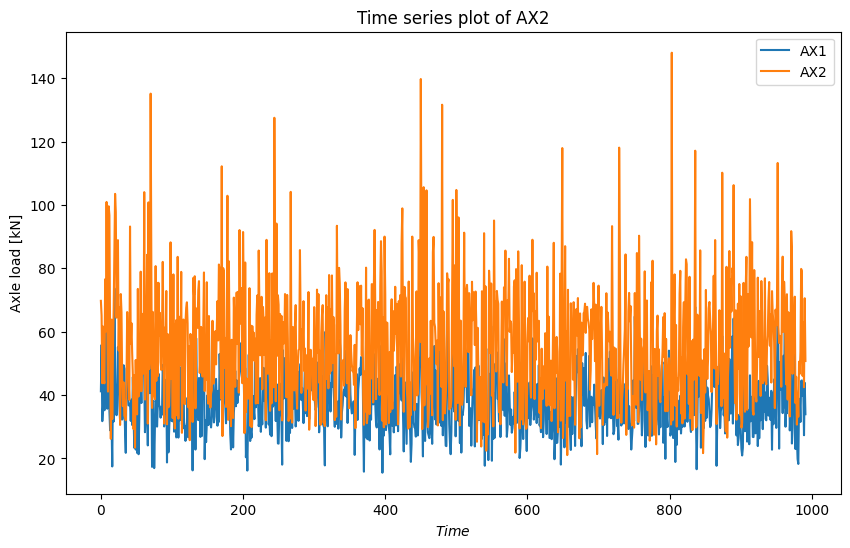

In [8]:
fig1, ax1 = AX1_object.time_series_plot()
AX2_object.time_series_plot(ax = ax1, fig = fig1);

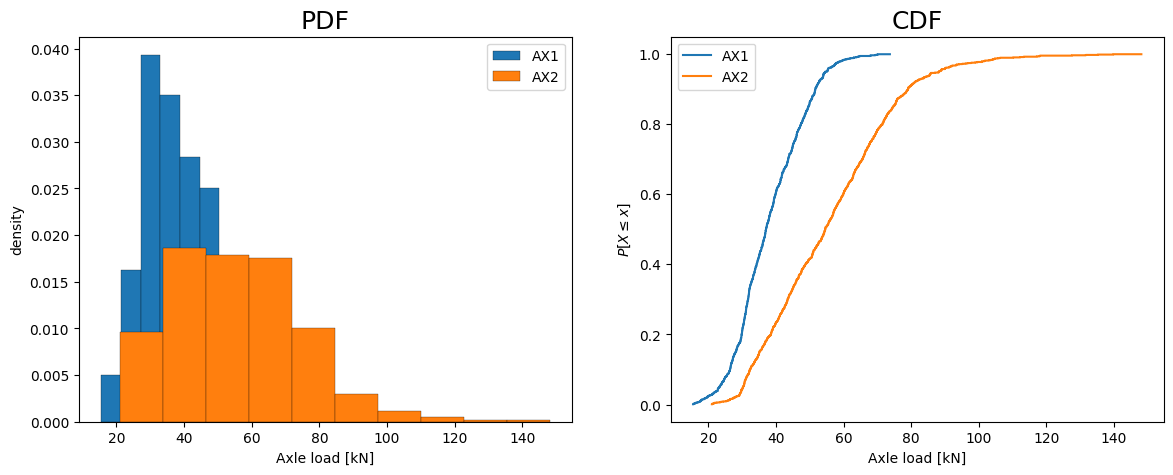

In [9]:
fig2, ax2 = AX1_object.PDF_and_ECDF_plot();
AX2_object.PDF_and_ECDF_plot(axes = ax2, fig = fig2);

In [10]:
# Fit distributions
AX1_object.fitting_distributions()
AX2_object.fitting_distributions()

In [11]:
AX1_object.RV_logn.stats()

(38.256556834202456, 110.73599993256393)

In [12]:
AX1_object.RV_logn

def ecdf(var):
    x = np.sort(var) # sort the values from small to large
    n = x.size # determine the number of datapoints
    y = np.arange(1, n+1) / (n+1)
    return [x,y]

x,y = ecdf(AX1)

AX1_object.RV_logn.cdf(x)

array([6.51947348e-04, 8.53385747e-04, 1.12178917e-03, 1.17421951e-03,
       1.53355162e-03, 1.97960508e-03, 2.56107227e-03, 2.80763476e-03,
       3.21341184e-03, 3.25441432e-03, 3.46583266e-03, 4.01875279e-03,
       4.06785657e-03, 4.58590679e-03, 6.01214795e-03, 6.53458252e-03,
       6.67976957e-03, 8.06124259e-03, 8.99129534e-03, 1.03069902e-02,
       1.04100443e-02, 1.05661104e-02, 1.10451203e-02, 1.24040234e-02,
       1.38223894e-02, 1.57108644e-02, 1.79422953e-02, 1.93894867e-02,
       2.08337773e-02, 2.11847919e-02, 2.12732192e-02, 2.50364731e-02,
       2.53369026e-02, 2.61507594e-02, 2.67733808e-02, 3.01605857e-02,
       3.15499767e-02, 3.57308510e-02, 3.66373012e-02, 3.72944649e-02,
       3.72944649e-02, 3.74268716e-02, 3.76926614e-02, 3.78260452e-02,
       3.95898352e-02, 3.98661235e-02, 4.12674529e-02, 4.35790620e-02,
       4.46175180e-02, 4.49172717e-02, 4.56726109e-02, 4.70537391e-02,
       4.75202871e-02, 4.90978423e-02, 5.20248228e-02, 5.30256141e-02,
      

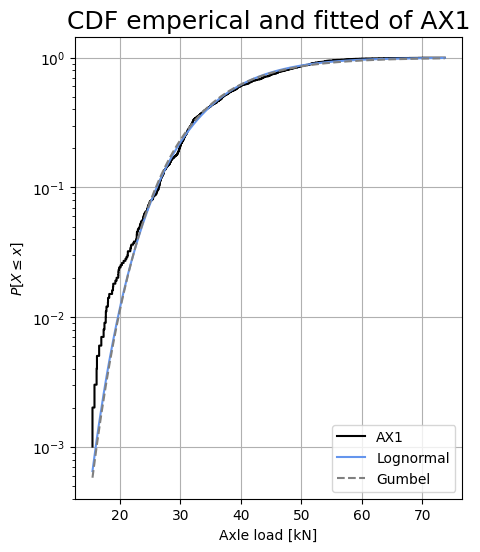

In [13]:
AX1_object.graphical_assessing_goodness_of_fit();


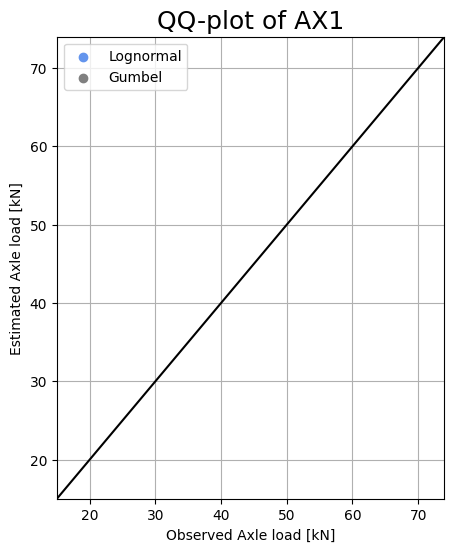

In [14]:
AX1_object.QQ_plot();

In [15]:
AX1_object.KS_test()
AX2_object.KS_test()

TypeError: Value after * must be an iterable, not method

## Creating a class 

In [ ]:
import scipy
class augmented_RV_continuous_class(scipy.stats.rv_continuous):
    
    
    def __init__(self,
                 time_series_data: np.array,
                 data_title = None,
                 data_units = None
                 ):
        """Attributes of the emperical_data class.
        
        Parameters
        ----------
        time_series_data : `numpy.array`
            Numpy array containing time series data. This data is used to perform
            emperical statistical analysis on. 
        data_label : `str`   
            This is the label of the data. This is used for plotting purposes.
            
            
        Examples
        --------
        If one has a timeseries in the csv file 'data.csv' and wants to perform 
        statistical operations on it, one can use the following code:

        >>> data_array = np.genfromtxt('data.csv', delimiter=',')
        >>> data_label = "Measured data"
        >>> Emperical_data(data_array, data_label)
        
        """
        
        # Assign input to attributes
        self.data_array = time_series_data
        self.data_title = data_title
        self.data_units = data_units
        
        

        # To be computed
        self.extremes = None
        self._bivariate_vars = None
        self._bivar_r_norm = None
        self._cov = None
        self._cor = None
        self.statistical_summary = None